In [ ]:
%matplotlib inline
from pylab import *
from sie.mcmc import StatsModel

In [ ]:
x=array([ .2, 0.39595125,   0.22981019,  -4.38971186,   4.57653843,
         4.38800312,  -3.14227423,  -1.66494169,  -4.0148864 ,
         4.10562856,   2.19091249,  11.18389772,   1.53046862,
        -6.05251134,  -1.5028012 ,   1.12985659,   0.84215301,
        -4.37528332,  -1.51364766,  -6.06991254,  -1.11838459,
         3.94521945,   3.65019148,  -0.5446649 ,   0.85721735,
         1.41391355,   1.43089269,   0.6089257 ,   5.03635336,
         4.92170115,   4.2066542 ,   2.48580373,   9.2895543 ,
         2.92144036,   2.91079341,   0.55777809,   8.04122751,
       -12.06833542,  -0.70706651,  14.96419495,   0.82773164,
         6.32229804,   6.71565991,   5.57064652,   4.87913438,
        -0.39353282,  -4.45373509,  -3.54839884,   5.38362984,
         4.70926759,   3.65790252,   0.63145437,   5.24971408,
         8.2553935 ,   4.79006995,  -8.33670551,  -4.61956851,
        -4.83453087,   1.62173756,  -1.92585591,  -2.63973241,
         4.1506629 ,   3.56013401,  13.35631639,  -5.52537233,
        -1.49474565,  -2.07293056,   5.4540973 ,   2.97490357,
         4.6955487 ,   0.82952536,  -5.67363532,   9.0946318 ,
        -2.52705592,   4.10840195,  -3.08773704,  -4.35166723,
         9.03615482,   4.83026807,  -2.86675068,   2.70522369,
        13.07522118,  -5.78459681,   3.28781511,   4.80430383,
         2.27368715,  -7.48890544,   0.47985461,  17.22158394,
         2.85875906, -12.35840458,   1.67710649,  -0.37967208,
        -5.64580007,  -3.87064346,   4.78512975,  12.36217118,
         1.75239768,   2.77851485,  -2.17896821,   6.25559514])

In [ ]:
len(x)

101

In [ ]:
model=StatsModel()
model.add_data(x=x)
model.add("m ~ Normal(0,10)")
model.add("x ~ Normal(m,1)")
model.initialize()

In [ ]:
print(model.make_func())

def _lnprior(θ,slices,extra={}):
    m=θ[slices.m]

    _value=0

    _value+=Normal(0,10)(m)

    return _value


def _init_prior(nwalkers,ndim,data,slices,extra={}):
    x=data['x']

    _pos=np.zeros((nwalkers,ndim))
    m=_pos[:,slices.m]=init_Normal(0,10)(nwalkers)

    return _pos


def _lnlikelihood(θ,data,slices,extra={}):
    x=data['x']

    m=θ[slices.m]


    _value=0

    _value+=Normal(m,1)(x)

    return _value.sum()



Sampling Prior...
Done.
0.19 s
Running MCMC 1/3...
Done.
0.95 s
Samples
Running MCMC 2/3...
Done.
0.94 s
Samples
Running MCMC 3/3...
Done.
0.93 s
Samples
figsize [6.4, 4.0]


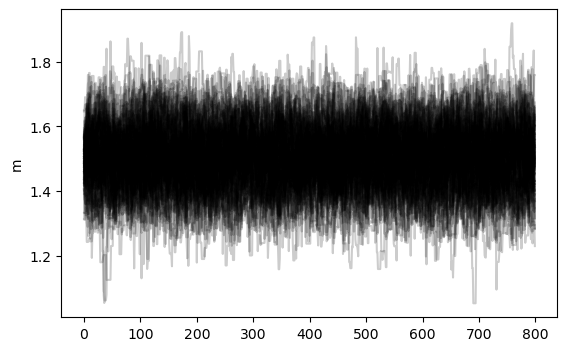

In [ ]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

In [ ]:
model.initial_pos.shape

(100, 1)

In [ ]:
raise ValueError

ValueError: 

In [ ]:
self=model
θ=self.initial_pos[0,:]
θ,self._lnprior(θ,self.slices,self.extra_params),self._lnlikelihood(θ,self.data,self.slices,self.extra_params)

In [ ]:
hist(self.initial_pos)

In [ ]:
xy1="""
X	Y
10	8.04
8	6.95
13	7.58
9	8.81
11	8.33
14	9.96
6	7.24
4	4.26
12	10.84
7	4.82
5	5.68
"""
xy=xy1
x,y=array([_.split() for _ in xy.strip().split('\n')[1:]],dtype=float).T
x,y

(array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
         4.82,  5.68]))

In [ ]:
model=StatsModel()
model.add_data(x=x,y=y)
model.add("m ~ Normal(0,10)")
model.add("b ~ Normal(0,10)")
model.add("y ~ Normal(m*x+b,1)")
model.initialize()


In [ ]:
# model=StatsModel()
# model.add_data(x=x,y=y)
# model.add("m ~ Normal(0,10)")
# model.add("b ~ Normal(0,10)")
# model.add("σ ~ Jeffreys()")
# model.add("res ~ Normal(m*x+b-y,σ,sum=True)")
# model.initialize()
# model

In [ ]:
print(model.make_func())

def _lnprior(θ,slices,extra={}):
    m=θ[slices.m]
    b=θ[slices.b]

    _value=0

    _value+=Normal(0,10)(m)
    _value+=Normal(0,10)(b)

    return _value


def _init_prior(nwalkers,ndim,data,slices,extra={}):
    x=data['x']
    y=data['y']

    _pos=np.zeros((nwalkers,ndim))
    m=_pos[:,slices.m]=init_Normal(0,10)(nwalkers)
    b=_pos[:,slices.b]=init_Normal(0,10)(nwalkers)

    return _pos


def _lnlikelihood(θ,data,slices,extra={}):
    x=data['x']
    y=data['y']

    m=θ[slices.m]
    b=θ[slices.b]


    _value=0

    _value+=Normal(m*x+b,1)(y)

    return _value.sum()



Sampling Prior...
Done.
0.30 s
Running MCMC 1/3...
Done.
1.33 s
Samples
Running MCMC 2/3...
Done.
1.32 s
Samples
Running MCMC 3/3...
Done.
1.33 s
Samples
figsize [6.4, 8.0]


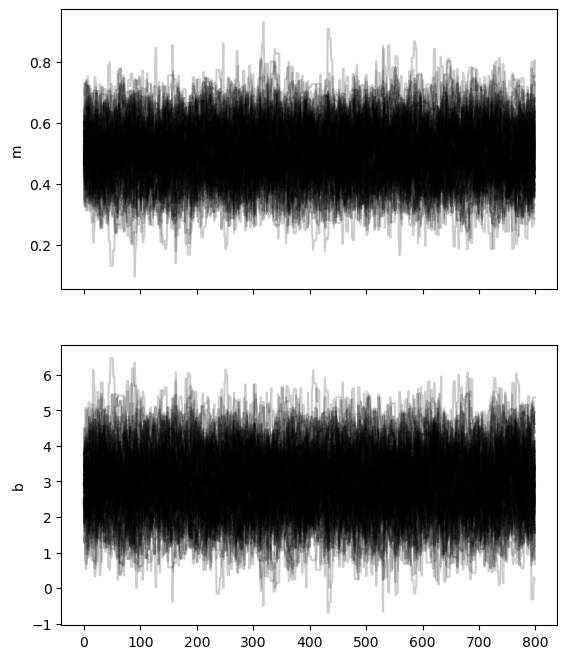

In [ ]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

In [ ]:
self=model
args=[key for key in self.parameters if len(self.parameters[key])==1]
result={}
for key in args:
    s=self.slices.__getattribute__(key)
    sub_sample=self.samples[:,s]
    result[key]=np.percentile(sub_sample,[16,50,84],axis=0)

In [ ]:
result

{'m': array([[0.41014988],
        [0.50540031],
        [0.59880641]]),
 'b': array([[2.05559951],
        [2.95931034],
        [3.85147497]])}

[('m', 0, array([0.3234603 , 0.50540031, 0.69142507])),
 ('b', 0, array([1.1870701 , 2.95931034, 4.70133465]))]

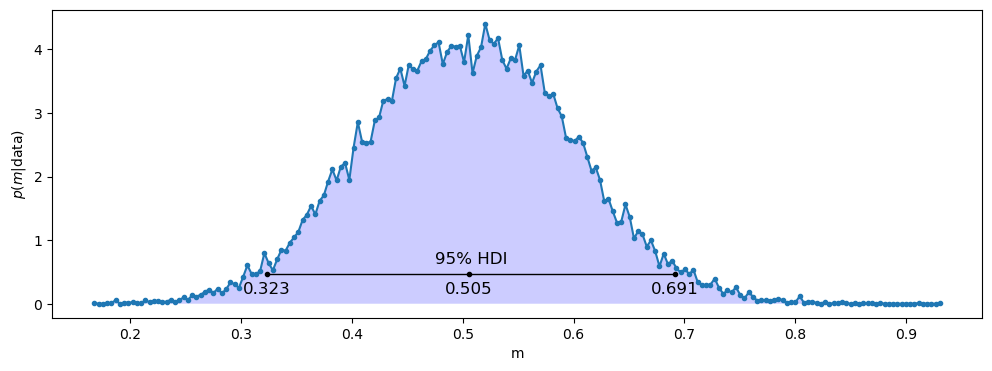

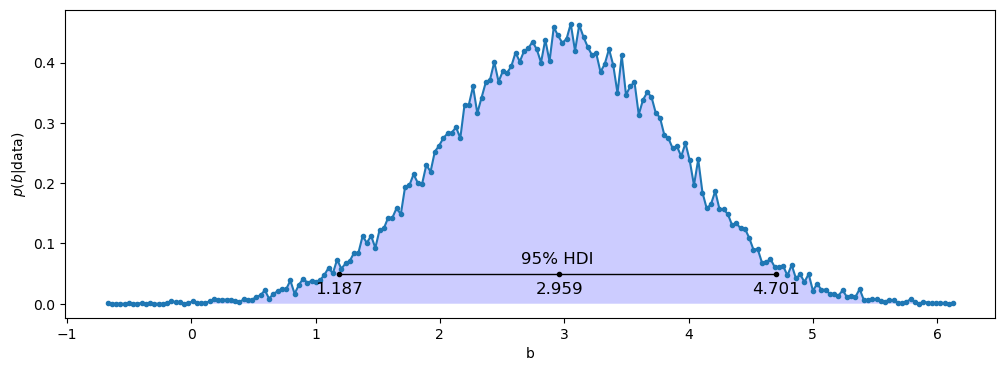

In [ ]:
model.plot_distributions()

In [ ]:
print(model.make_func())

In [ ]:
raise ValueError

In [ ]:
x,y

(array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
         4.82,  5.68]))

In [ ]:
model=StatsModel()
model.add_data(x=x,y=y)
model.add("m ~ Normal(0,10)")
model.add("b ~ Normal(0,10)")
model.add("σ ~ Jeffreys()")
model.add("y ~ Normal(m*x+b,σ)")  
model.initialize()


In [ ]:
print(model.make_func())

def _lnprior(θ,slices,extra={}):
    m=θ[slices.m]
    b=θ[slices.b]
    σ=θ[slices.σ]

    _value=0

    _value+=Normal(0,10)(m)
    _value+=Normal(0,10)(b)
    _value+=Jeffreys()(σ)

    return _value


def _init_prior(nwalkers,ndim,data,slices,extra={}):
    x=data['x']
    y=data['y']

    _pos=np.zeros((nwalkers,ndim))
    m=_pos[:,slices.m]=init_Normal(0,10)(nwalkers)
    b=_pos[:,slices.b]=init_Normal(0,10)(nwalkers)
    σ=_pos[:,slices.σ]=init_Jeffreys()(nwalkers)

    return _pos


def _lnlikelihood(θ,data,slices,extra={}):
    x=data['x']
    y=data['y']

    m=θ[slices.m]
    b=θ[slices.b]
    σ=θ[slices.σ]


    _value=0

    _value+=Normal(m*x+b,σ)(y)

    return _value.sum()



Sampling Prior...
Done.
0.36 s
Running MCMC 1/3...
Done.
1.60 s
Samples
Running MCMC 2/3...
Done.
1.61 s
Samples
Running MCMC 3/3...
Done.
1.64 s
Samples
figsize [6.4, 12.0]


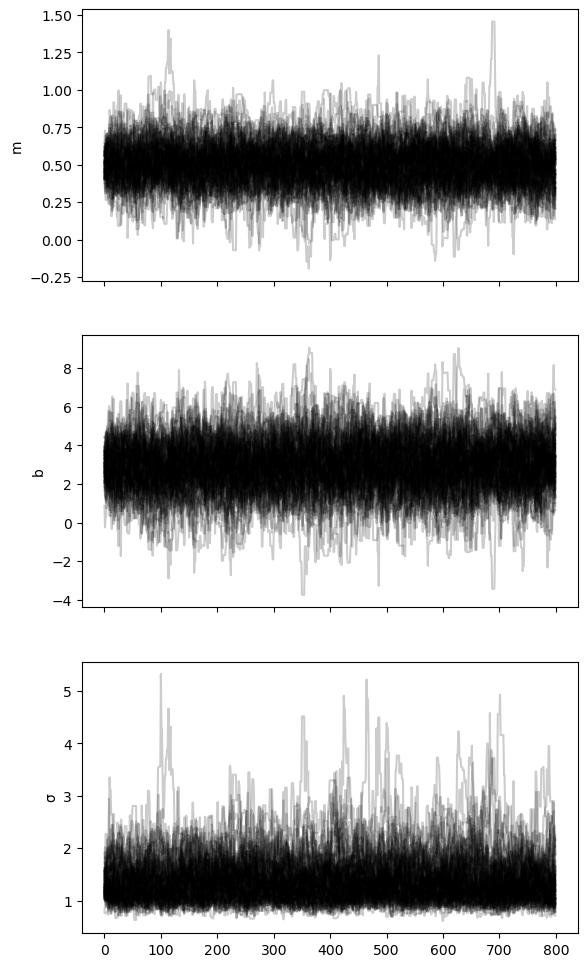

In [ ]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

In [ ]:
self=model
θ=self.initial_pos[:20,:]
θ

array([[-14.726862,  -2.881727,   1.145552],
       [  8.531632,   0.685361,   0.872754],
       [ 16.336694, -15.209931,   0.698796],
       [  9.78161 , -12.341471,   0.377232],
       [ -2.776358,  13.552778,   1.242028],
       [  1.060544,  -6.029887,   0.708603],
       [-10.605965,  14.928011,   0.964605],
       [ -4.620638,   4.434791,   0.529033],
       [ 12.282724,  -4.594871,   1.543504],
       [  7.518043,  10.281135,   1.942945],
       [ -2.968734,  -0.822276,   1.960529],
       [-14.720863,  -4.546646,   1.493483],
       [  4.680451,   4.537066,   0.825135],
       [ 23.6882  ,  -1.853356,   0.035843],
       [ -4.423048,  -2.939452,   1.590533],
       [ -4.26002 ,  -7.994485,   1.931194],
       [ -8.239802,  -8.404516,   1.91273 ],
       [-20.471723,  -5.985963,   1.72975 ],
       [  0.197142,  15.275296,   1.393157],
       [  2.190642,  -0.307717,   0.447838]])

In [ ]:
arr=self.initial_pos[:20,:]-array([.1,.1,.1])
arr

array([[-14.826862,  -2.981727,   1.045552],
       [  8.431632,   0.585361,   0.772754],
       [ 16.236694, -15.309931,   0.598796],
       [  9.68161 , -12.441471,   0.277232],
       [ -2.876358,  13.452778,   1.142028],
       [  0.960544,  -6.129887,   0.608603],
       [-10.705965,  14.828011,   0.864605],
       [ -4.720638,   4.334791,   0.429033],
       [ 12.182724,  -4.694871,   1.443504],
       [  7.418043,  10.181135,   1.842945],
       [ -3.068734,  -0.922276,   1.860529],
       [-14.820863,  -4.646646,   1.393483],
       [  4.580451,   4.437066,   0.725135],
       [ 23.5882  ,  -1.953356,  -0.064157],
       [ -4.523048,  -3.039452,   1.490533],
       [ -4.36002 ,  -8.094485,   1.831194],
       [ -8.339802,  -8.504516,   1.81273 ],
       [-20.571723,  -6.085963,   1.62975 ],
       [  0.097142,  15.175296,   1.293157],
       [  2.090642,  -0.407717,   0.347838]])

In [ ]:
for θ in array([[-14.826862,  -2.981727,   1.045552],
       [  8.431632,   0.585361,   0.772754],
       [ 16.236694, -15.309931,   0.598796],
       [  9.68161 , -12.441471,   0.277232],
       [ -2.876358,  13.452778,   1.142028],
       [  0.960544,  -6.129887,   0.608603],
       [-10.705965,  14.828011,   0.864605],
       [ -4.720638,   4.334791,   0.429033],
       [ 12.182724,  -4.694871,   1.443504],
       [  7.418043,  10.181135,   1.842945],
       [ -3.068734,  -0.922276,   1.860529],
       [-14.820863,  -4.646646,   1.393483],
       [  4.580451,   4.437066,   0.725135],
       [ 23.5882  ,  -1.953356,  -0.064157],
       [ -4.523048,  -3.039452,   1.490533],
       [ -4.36002 ,  -8.094485,   1.831194],
       [ -8.339802,  -8.504516,   1.81273 ],
       [-20.571723,  -6.085963,   1.62975 ],
       [  0.097142,  15.175296,   1.293157],
       [  2.090642,  -0.407717,   0.347838]]):

    print(self._lnprior(array(θ),self.slices,self.extra_params),self._lnlikelihood(θ,self.data,self.slices,self.extra_params))
    

[-7.631224891362969] -116159.3398274462
[-6.542428059151197] -49697.414471604956
[-8.420334042283727] -271329.38395385613
[-6.402765538363496] -383453.39490697236
[-7.5221062380267165] -2289.2331150895484
[-6.138948937255586] -470.29672683154485
[-7.97000271263989] -67655.12462587257
[-5.802199993165438] -70463.07150370153
[-7.662423632391141] -28827.103612389965
[-7.847826447182335] -8771.080643876656
[-7.115246715202897] -2454.6368966886225
[-7.981100116335646] -66795.8851901681
[-6.324990248090959] -17058.520840343204
-inf -62101104.17347309
[-6.990662184862778] -7288.9677451029
[-7.47066777458644] -5505.819819024542
[-7.7472766976124685] -15373.11331653471
[-9.232647545350439] -91149.35291723192
[-7.851628994142052] -392.1112683348964
[-5.40971391318287] -6598.237813045524


0.4607162456260625

In [ ]:
np.set_printoptions(precision=20)
θ

array([ 2.090642, -0.407717,  0.347838])